In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

In [135]:
ruta_archivo = "/content/activity_1_ml.csv"

In [136]:
data = pd.read_csv(ruta_archivo)

In [137]:
print(data)

      WAGE  EDUC  EXPER  GENDER FAM_STATUS  TENURE
0    10.00     0      3    male    MARRIED       2
1     3.50     0      2  female      alone       0
2     3.30     0      5  female     single       0
3     5.00     0     15    male    married       5
4    11.25     0     28    male    married      25
..     ...   ...    ...     ...        ...     ...
547   3.00     0      9    male        NaN       0
548   7.63     0      8  female     single       4
549   4.50     0     36  female    married       6
550    NaN     0     28    male    married       3
551   6.36     0      8    male    married       1

[552 rows x 6 columns]


In [138]:
wage = data[['WAGE', 'EDUC', 'EXPER', 'GENDER', 'FAM_STATUS', 'TENURE']]

In [139]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        490 non-null    float64
 1   EDUC        552 non-null    int64  
 2   EXPER       552 non-null    int64  
 3   GENDER      549 non-null    object 
 4   FAM_STATUS  469 non-null    object 
 5   TENURE      552 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 26.0+ KB


In [140]:
wage

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,0,3,male,MARRIED,2
1,3.50,0,2,female,alone,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
...,...,...,...,...,...,...
547,3.00,0,9,male,NaN,0
548,7.63,0,8,female,single,4
549,4.50,0,36,female,married,6
550,NaN,0,28,male,married,3


In [141]:
wage['GENDER'].unique()

array(['male', 'female', 'MALE', 'FEMALE', 'man', 'woman', nan],
      dtype=object)

In [142]:
dictio_correct = {'woman':'female',
                  'fem':'female',
                  'man':'male',
                  'female':'female',
                  'male':'male',
                  'FEMALE':'female',
                  'MALE':'male'}

In [143]:
wage['GENDER'] = wage['GENDER'].map(dictio_correct)

In [144]:
wage['GENDER'].unique()

array(['male', 'female', nan], dtype=object)

In [145]:
wage = wage.dropna(subset=['GENDER'])

In [147]:
wage['GENDER'].unique()

array(['male', 'female'], dtype=object)

In [148]:
wage

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,0,3,male,MARRIED,2
1,3.50,0,2,female,alone,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
...,...,...,...,...,...,...
547,3.00,0,9,male,NaN,0
548,7.63,0,8,female,single,4
549,4.50,0,36,female,married,6
550,NaN,0,28,male,married,3


In [149]:
wage['FAM_STATUS'].unique()

array(['MARRIED', 'alone', 'single', 'married', nan, 'SINGLE'],
      dtype=object)

In [150]:
dictio_correct = {'MARRIED':'married',
                  'alone':'single',
                  'SINGLE':'single',
                  'single':'single',
                  'married':'married'}

In [ ]:
wage['FAM_STATUS'] = wage['FAM_STATUS'].map(dictio_correct)

In [152]:
wage = wage.dropna(subset=['FAM_STATUS'])

In [153]:
wage['FAM_STATUS'].unique()

array(['married', 'single'], dtype=object)

In [154]:
wage.duplicated().sum()

22

In [ ]:
wage.drop_duplicates(inplace=True)
wage.reset_index(drop=True, inplace=True)

In [156]:
wage.duplicated().sum()

0

In [107]:
wage

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,0,3,male,married,2
1,3.50,0,2,female,single,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
...,...,...,...,...,...,...
439,2.90,0,1,male,single,2
440,3.25,0,14,female,married,2
441,7.63,0,8,female,single,4
442,NaN,0,28,male,married,3


In [108]:
wage['EXPER'].unique()

array([ 3,  2,  5, 15, 28, 47,  1, 38, 27, 18,  6, 17, 14, 22, 31,  7, 30,
       19, 39, 43, 48, 10, 11, 24, 35,  9, 25, 42, 41, 26, 29,  8,  4, 37,
       34, 23, 44, 33, 13, 16, 21, 32, 36, 51, 45, 20, 49, 40, 12])

In [109]:
wage = wage.dropna(subset=['WAGE'])

In [110]:
wage['WAGE'].unique()

array([10.        ,  3.5       ,  3.29999995,  5.        , 11.25      ,
        4.28999996,  5.57999992,  3.        ,  4.6500001 ,  7.5       ,
        3.3499999 ,  7.        ,  3.27999997,  3.25      , 12.5       ,
        3.4000001 ,  4.38000011,  3.28999996, 11.56000042,  8.44999981,
        3.20000005,  4.80999994,  3.0999999 ,  2.9000001 ,  4.        ,
        4.75      , 17.70999908,  4.5       ,  5.11000013,  7.25      ,
        6.        ,  3.05999994,  6.17999983,  6.07999992,  2.95000005,
       22.20000076,  3.6400001 , 11.97999954, 13.07999992,  1.96000004,
        3.82999992,  5.5999999 ,  8.75      ,  4.57000017,  4.90999985,
       13.32999992,  8.47999954,  8.43000031, 11.81999969,  9.09000015,
       10.94999981,  5.25      ,  3.75      , 15.38000011,  3.25999999,
        6.76000023,  8.52999973,  3.50999999,  3.45000005, 10.38000011,
        2.70000005, 19.97999954, 12.39000034,  5.05000019,  5.69999981,
        4.11000013,  7.5999999 ,  7.78000021,  6.25      ,  4.09

In [111]:
wage

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,0,3,male,married,2
1,3.50,0,2,female,single,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
...,...,...,...,...,...,...
438,6.46,0,27,male,married,0
439,2.90,0,1,male,single,2
440,3.25,0,14,female,married,2
441,7.63,0,8,female,single,4


In [112]:
wage['TENURE'].unique()

array([ 2,  0,  5, 25,  1, 13,  6,  3, 24,  8, 10,  7, 23, 15, 11, 12, 20,
       21,  9, 14,  4, 16, 28, 22, 26, 17, 33, 30, 31, 18, 34, 44])

In [113]:
wage.isna().sum()

WAGE          0
EDUC          0
EXPER         0
GENDER        0
FAM_STATUS    0
TENURE        0
dtype: int64

In [114]:
wage

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,0,3,male,married,2
1,3.50,0,2,female,single,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
...,...,...,...,...,...,...
438,6.46,0,27,male,married,0
439,2.90,0,1,male,single,2
440,3.25,0,14,female,married,2
441,7.63,0,8,female,single,4


In [115]:
gen = wage['GENDER'].value_counts()
gen.index = ['m', 'f']

In [116]:
gen

m    201
f    196
Name: GENDER, dtype: int64

<BarContainer object of 2 artists>

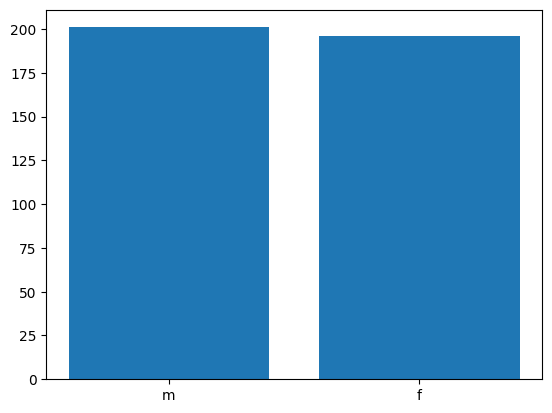

In [117]:
plt.bar(gen.index, gen.values)

<Axes: ylabel='None'>

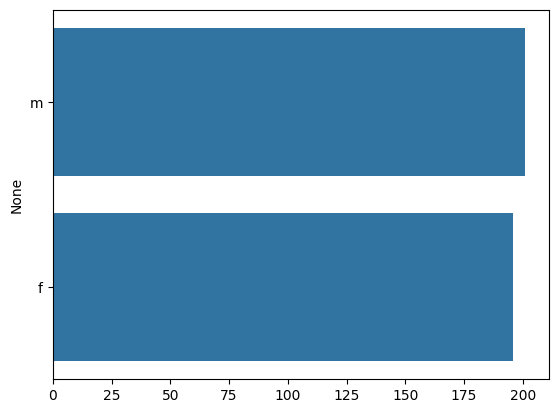

In [118]:
sns.barplot(x=gen.values, y=gen.index, orient='h')

In [119]:
fam = wage['FAM_STATUS'].value_counts()
fam.index = ['SINGLE', 'MARRIED']

In [120]:
fam

SINGLE     241
MARRIED    156
Name: FAM_STATUS, dtype: int64

<BarContainer object of 2 artists>

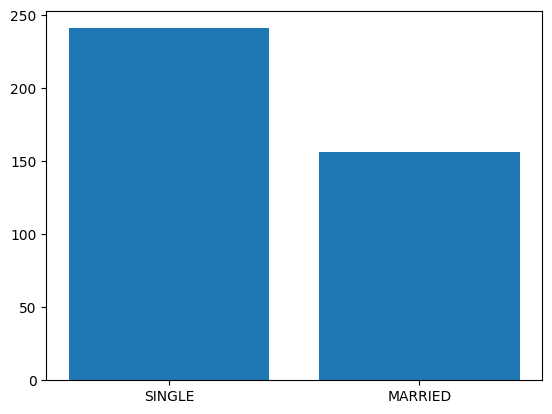

In [121]:
plt.bar(fam.index, fam.values)

<Axes: xlabel='WAGE', ylabel='Count'>

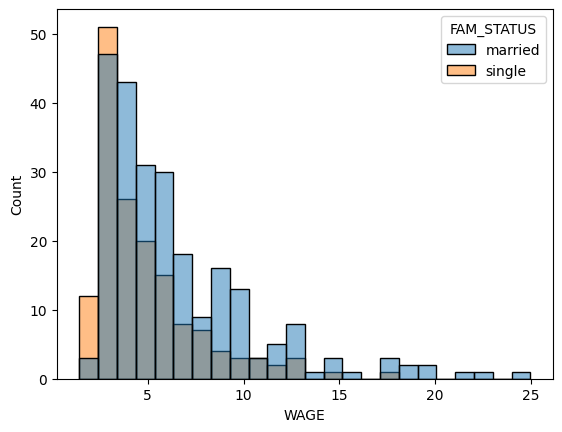

In [122]:
sns.histplot(wage, x='WAGE', hue='FAM_STATUS')

<Axes: xlabel='WAGE', ylabel='Count'>

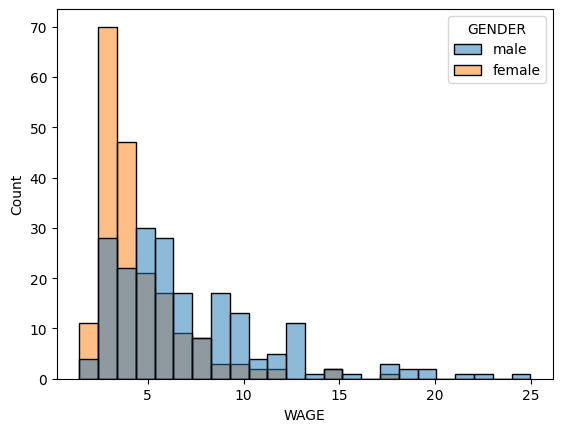

In [123]:
sns.histplot(wage, x='WAGE', hue='GENDER')

<Axes: ylabel='WAGE'>

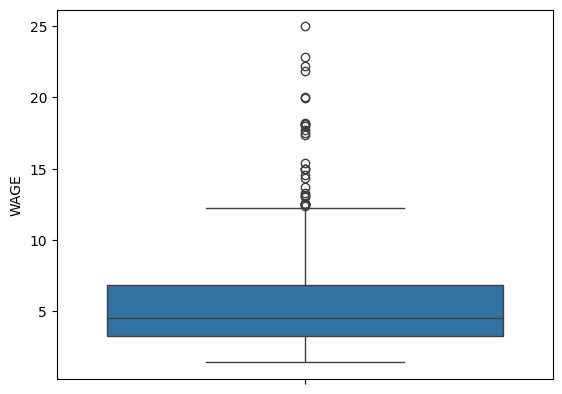

In [124]:
sns.boxplot(data, y='WAGE')

<Axes: ylabel='EXPER'>

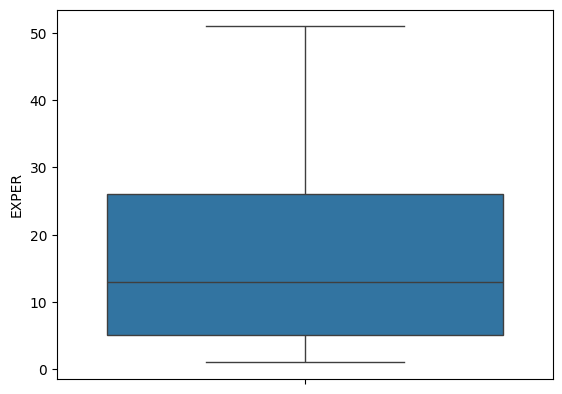

In [125]:
sns.boxplot(data, y='EXPER')

<Axes: ylabel='TENURE'>

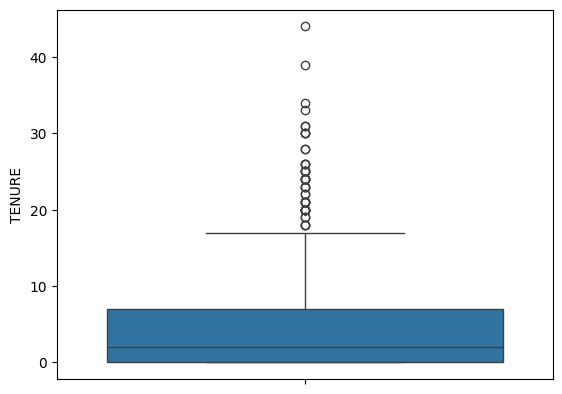

In [126]:
sns.boxplot(data, y='TENURE')

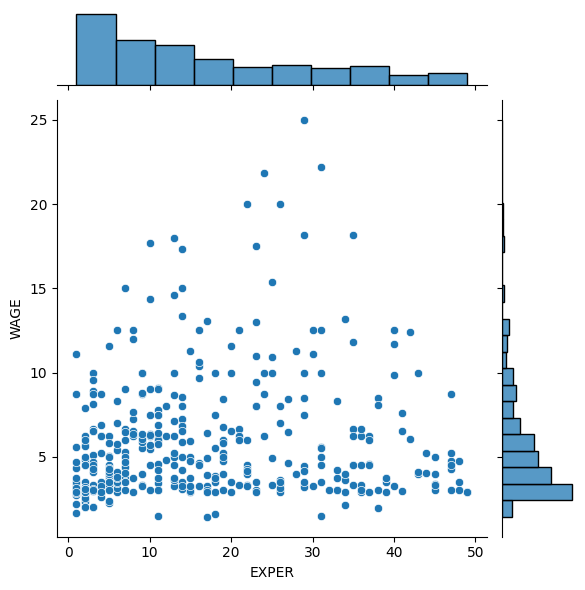

In [127]:
sns.jointplot(y=wage['WAGE'],x=wage['EXPER'])

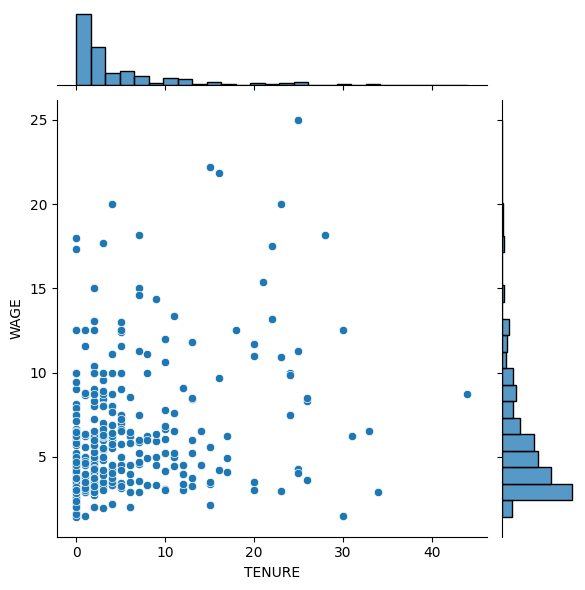

In [128]:
sns.jointplot(y=wage['WAGE'],x=wage['TENURE'])

In [129]:
pd.crosstab(wage['GENDER'],wage['FAM_STATUS'], normalize=True)

FAM_STATUS,married,single
GENDER,,
female,0.264484,0.229219
male,0.342569,0.163728


<Axes: >

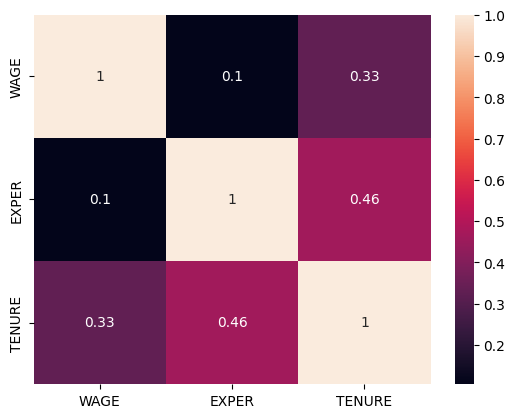

In [130]:
df = wage[['WAGE','EXPER','TENURE']]
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='FAM_STATUS', ylabel='WAGE'>

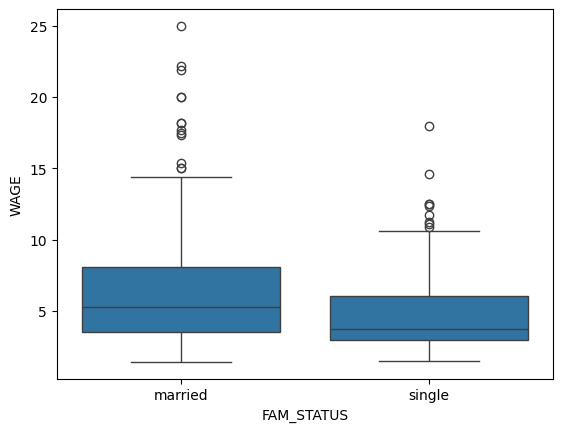

In [159]:
sns.boxplot(wage, y='WAGE', x='FAM_STATUS')

<Axes: xlabel='GENDER', ylabel='WAGE'>

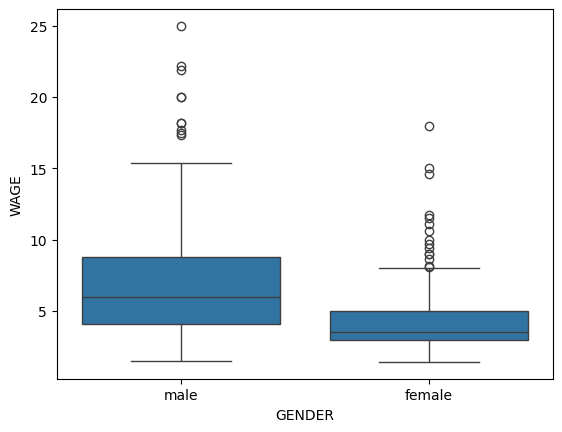

In [158]:
sns.boxplot(wage, y='WAGE', x='GENDER')